# Predicting Income Using Naive Bayes Classification: A Comprehensive Python and Scikit-Learn Approach


**In machine learning, Naive Bayes classification is a straightforward and powerful algorithm for the classification task. In this kernel, I implement Naive Bayes Classification algorithm with Python and Scikit-Learn. I build a Naive Bayes Classifier to predict whether a person makes over 50K a year.**


#  Introduction to Naive Bayes algorithm




In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


#  Naive Bayes algorithm intuition


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**. 

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))


Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.


Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. 


In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.


#  Applications of Naive Bayes algorithm



Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

1. Spam filtering
2. Text classification
3. Sentiment analysis
4. Recommender systems

It uses Bayes theorem of probability for prediction of unknown class.


# Import libraries

In [1]:
import numpy as np
import pandas as pd # data processing ,to create dataframe
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [3]:
df = pd.read_csv('adult.csv')


#  Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [4]:
# view dimensions of dataset

df.shape

(32560, 15)

We can see that there are 32561 number of records and 15 columns in this data set.

### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2 and so on. We should give proper names to the columns. I will do it as follows:

In [7]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
# let's again preview the dataset

df.head(8)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [9]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

We can see that there are no missing values in the dataset.

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type **"object"**. Numerical variables have data type **"int64"**.


First of all, I will explore categorical variables.

### Explore categorical variables

In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtypes=='O']#O represents object data type

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [12]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


### Summary of categorical variables


- There are 9 categorical variables. 


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

### Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [13]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further.

Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as **'something else'**. Python fail to detect these as missing values because it do not consider  as missing values. So, I have to replace  with `NaN` so that Python can detect these missing values.

I will explore these variables 

### Explore workclass variable

In [14]:
# check labels in workclass variable

df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [16]:
# replace '?' values in workclass variable with `NaN`
df['workclass'] = df['workclass'].str.strip()#there are spaces inbetween initially,so it didnt recognize '?'. so i use str.strip()
df['workclass'].replace('?', np.NaN, inplace=True)


In [17]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Now, we can see that there are no values encoded as `?` in the `workclass` variable.

I will adopt similar approach with `occupation` and `native_country` column.

In [18]:
 for i in df['workclass']:
        print(i)

Self-emp-not-inc
Private
Private
Private
Private
Private
Self-emp-not-inc
Private
Private
Private
State-gov
Private
Private
Private
Private
Self-emp-not-inc
Private
Private
Self-emp-not-inc
Private
Private
Federal-gov
Private
Private
Local-gov
Private
nan
Private
Private
Local-gov
Private
Private
Federal-gov
State-gov
Private
Private
Private
Private
Self-emp-not-inc
Private
Self-emp-not-inc
Private
Private
Private
Federal-gov
Private
Private
State-gov
Private
Private
Private
Private
Federal-gov
Self-emp-inc
Private
Private
Private
Private
Private
Private
nan
Private
Private
Private
Private
Private
Private
Self-emp-inc
nan
Private
Private
Self-emp-not-inc
Private
Private
Private
Private
nan
Private
Local-gov
Private
Private
Private
Private
Private
Private
Local-gov
Private
Private
Federal-gov
Private
Private
Private
Private
Local-gov
Local-gov
Self-emp-not-inc
Private
Private
Federal-gov
Private
Private
Self-emp-not-inc
Private
Private
Self-emp-inc
nan
Private
Local-gov
Private
Private


### Explore occupation variable

In [19]:
# check labels in occupation variable

df.occupation.unique()


array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [20]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

We can see that there are 1843 values encoded as `?` in `occupation` variable. I will replace these `?` with `NaN`.

In [21]:
# replace '?' values in occupation variable with `NaN`
df['occupation']=df['occupation'].str.strip()
df['occupation'].replace('?', np.NaN, inplace=True)


In [22]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

### Explore native_country variable


In [23]:
# check labels in native_country variable

df.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()


native_country
 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

We can see that there are 583 values encoded as `?` in `native_country` variable. I will replace these `?` with `NaN`.


In [25]:
# replace '?' values in native_country variable with `NaN`
df['native_country']=df['native_country'].str.strip()
df['native_country'].replace('?', np.NaN, inplace=True)

In [26]:
# again check the frequency distribution of values in native_country variable

df.native_country.value_counts()

native_country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [26]:
df['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [28]:
df['marital_status'].value_counts()

marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

In [29]:
df['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [30]:
df['race'].value_counts()

race
 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [31]:
df['sex'].value_counts()

sex
 Male      21789
 Female    10771
Name: count, dtype: int64

In [32]:
df['income'].value_counts()

income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64

### Check missing values in categorical variables again

In [27]:
df[categorical].isnull().sum() 

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [28]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [29]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that `native_country` column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

### Explore Numerical Variables

In [30]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [37]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


**we will check for outliers**

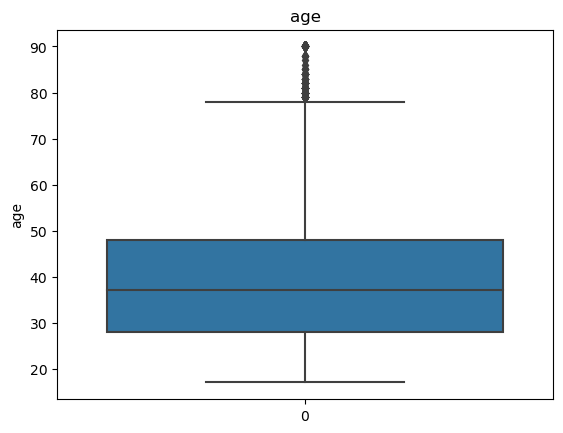

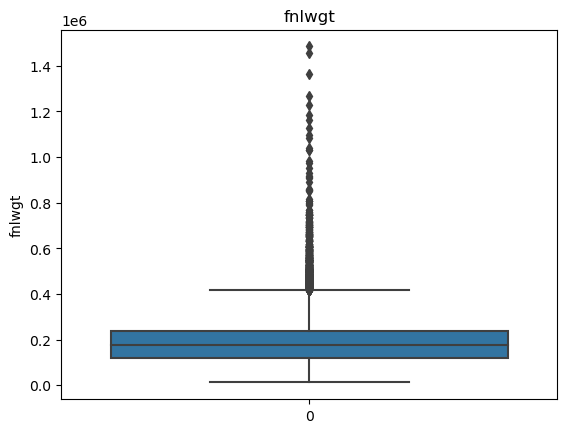

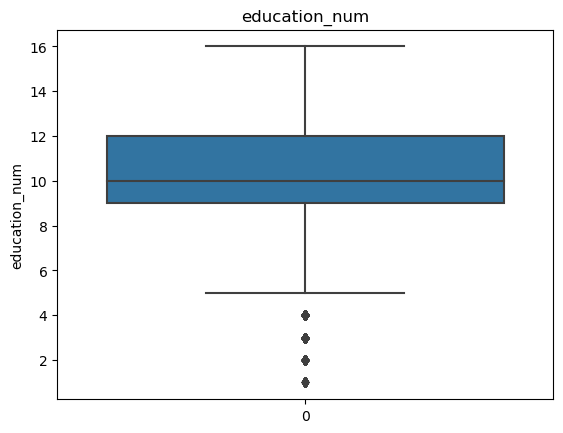

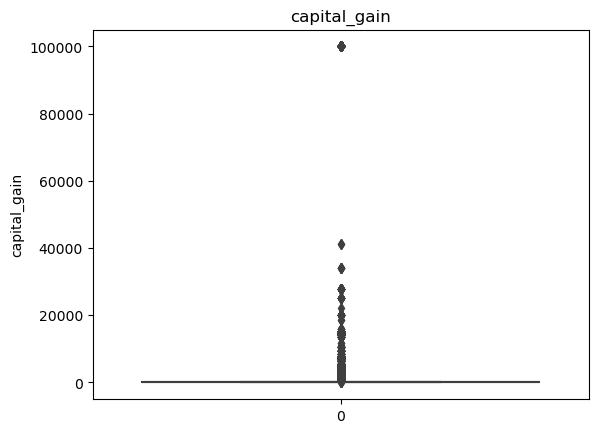

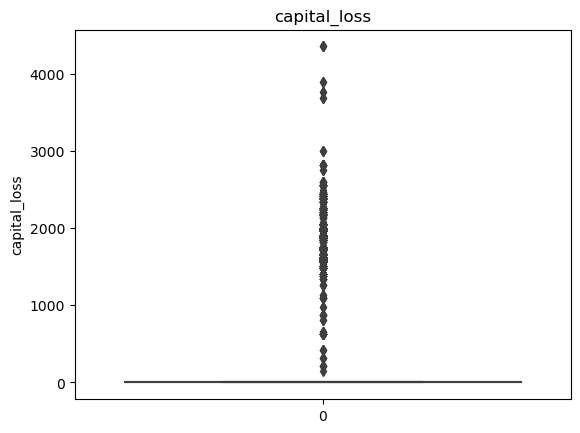

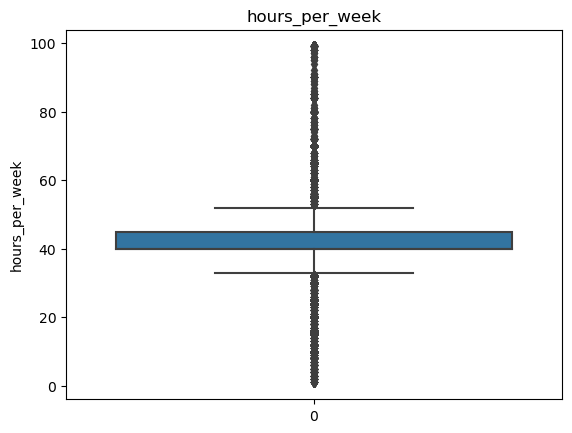

In [96]:
for feature in numerical:
    data=df.copy()
    sns.boxplot(data=data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Summary of numerical variables


- There are 6 numerical variables. 


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type and has outliers also

### Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [31]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values. 

#  Declare feature vector and target variable

In [32]:
X = df.drop(['income'], axis=1)

y = df['income']

#  Split data into separate training and test set

In [33]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [34]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9768, 14))

In [35]:
y_train.shape,y_test.shape

((22792,), (9768,))

# 10. Feature Engineering




**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [36]:
# check data types in X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [37]:
X_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
20721,32,Self-emp-inc,343872,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,35,Haiti
32097,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25205,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,37,Private,61778,Bachelors,13,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,30,United-States
12367,24,Private,108495,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,23,Private,181557,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,25,United-States
19648,19,Private,188864,HS-grad,9,Never-married,Sales,Unmarried,Black,Female,0,0,20,United-States
9845,43,Self-emp-not-inc,311177,Some-college,10,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,30,United-States
10799,21,State-gov,39236,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,50,United-States


In [38]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [39]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [40]:

X_train[categorical].isnull().mean().round(4)
    

workclass         0.0572
education         0.0000
marital_status    0.0000
occupation        0.0574
relationship      0.0000
race              0.0000
sex               0.0000
native_country    0.0183
dtype: float64

In [41]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)
    df2['workclass'].fillna(X_test['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_test['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_test['native_country'].mode()[0], inplace=True) 

In [42]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [44]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [45]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Encode categorical variables

In [46]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [47]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
20721,Self-emp-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,Black,Male,Haiti
32097,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25205,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Bachelors,Never-married,Farming-fishing,Not-in-family,White,Male,United-States
12367,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,India


In [48]:
# import category encoders

import category_encoders as ce

In [59]:
# encode remaining variables with one-hot encoding

''''encoder = ce.OneHotEncoder(cols=[i for i in categorical])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)'''

"'encoder = ce.OneHotEncoder(cols=[i for i in categorical])\n\nX_train = encoder.fit_transform(X_train)\n\nX_test = encoder.transform(X_test)"

In [49]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [50]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
20721,32,1,0,0,0,0,0,0,0,343872,...,0,0,0,0,0,0,0,0,0,0
32097,45,0,1,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25205,47,0,0,1,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,37,0,1,0,0,0,0,0,0,61778,...,0,0,0,0,0,0,0,0,0,0
12367,24,0,1,0,0,0,0,0,0,108495,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train.shape

(22792, 105)

We can see that from the initial 14 columns, we now have 105 columns.

Similarly, I will take a look at the `X_test` set.

In [52]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,40,1,0,0,0,0,0,0,0,193524,...,0,0,0,0,0,0,0,0,0,0
8950,46,0,1,0,0,0,0,0,0,188027,...,0,0,0,0,0,0,0,0,0,0
7838,33,0,1,0,0,0,0,0,0,202498,...,0,0,0,0,0,0,0,0,0,0
16505,21,0,1,0,0,0,0,0,0,184756,...,0,0,0,0,0,0,0,0,0,0
19140,59,0,1,0,0,0,0,0,0,106748,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_test.shape

(9768, 105)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

#  Feature Scaling



In [53]:
cols = X_train.columns

In [54]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [55]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [56]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [58]:
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.374471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.066379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.582591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.974966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585881,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22788,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22789,0.30,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.102169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22790,-0.80,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.162709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have `X_train` dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

#  Model training


In [59]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

#  Predict the results



In [60]:
y_pred = gnb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Check accuracy score

In [61]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8164


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Check for overfitting and underfitting

In [62]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8089
Test set score: 0.8164


The training-set accuracy score is 0.8089 while the test-set accuracy to be 0.8164. These two values are quite comparable. So, there is no sign of overfitting. 


### Compare model accuracy with null accuracy


So, the model accuracy is 0.8164. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [64]:
# check class distribution in test set

y_test.value_counts()

income
 <=50K    7454
 >50K     2314
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7454. So, we can calculate null accuracy by dividing 7454 by total number of occurences.

In [70]:
# check null accuracy score

null_accuracy = (7454/(7454+2314))

print('Null accuracy score: {:.4f}'. format(null_accuracy))

Null accuracy score: 0.7631


We can see that our model accuracy score is 0.8164 but null accuracy score is 0.7631. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [71]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6105 1349]
 [ 444 1870]]

True Positives(TP) =  6105

True Negatives(TN) =  1870

False Positives(FP) =  1349

False Negatives(FN) =  444


The confusion matrix shows `6105+ 1870 = 7975 correct predictions` and `1349 + 444 = 1793 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 6105


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1870


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1349 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 444 `(Type II error)`

<AxesSubplot:>

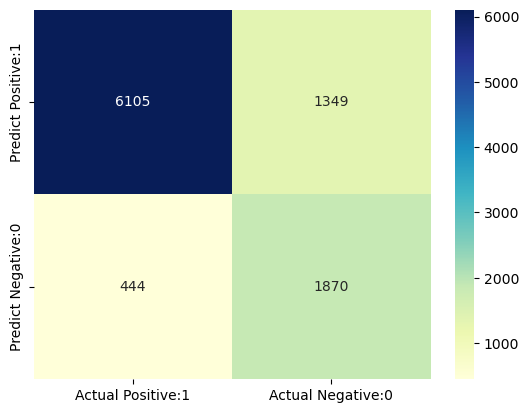

In [72]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices



### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model.
We can print a classification report as follows:-

In [94]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test, y_pred))
print('accuracy score:{:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

              precision    recall  f1-score   support

       <=50K       0.93      0.82      0.87      7454
        >50K       0.58      0.81      0.68      2314

    accuracy                           0.82      9768
   macro avg       0.76      0.81      0.77      9768
weighted avg       0.85      0.82      0.83      9768

accuracy score:81.64%


### Classification accuracy

In [75]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [76]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8164


### Classification error

In [77]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1836


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [86]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9322


### False Positive Rate

In [87]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4191


### Specificity

In [88]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5809


### Observations


- There are relatively small number of observations with salary >50k


- Majority of observations predcit that the salaries will be <=50K.

# **Cross Validation** 

In [95]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print(min(scores))
print(max(scores))

Cross-validation scores:[0.81008772 0.81622807 0.80298376 0.8095656  0.78850373 0.8174638
 0.81790259 0.80342255 0.8174638  0.80254498]
0.7885037297060115
0.8179025888547609


We can summarize the cross-validation accuracy by calculating its mean.

In [84]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8086


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 80.86% accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.79% accuracy to 78.85% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

- Our original model accuracy is 0.8164, but the mean cross-validation accuracy is 0.8086. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# Result and Conclusion

1.In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8086.

2.The training-set accuracy score is 0.8089 while the test-set accuracy to be 0.8164. These two values are quite comparable. So, there is no sign of overfitting.

3.I have compared the model accuracy score which is 0.8083 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.

4.Using the mean cross-validation, we can conclude that we expect the model to be around 80.86% accurate on average.

5.If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.79% accuracy to 78.85% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

6.Our original model accuracy is 0.8164, but the mean cross-validation accuracy is 0.8086. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.